### Import all the Libraries

In [247]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sn
from statsmodels.tsa.holtwinters import ExponentialSmoothing

### Import data file

In [248]:
df = pd.read_csv('Electricity Consumption.csv')
df.head(3)

,DATE,Electricty_Consumption_in_TW
0,1/1/1973,35.9728
1,2/1/1973,36.1334
2,3/1/1973,35.0625


In [249]:
df.shape

(561, 2)

In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   DATE                          561 non-null    object 
 1   Electricty_Consumption_in_TW  561 non-null    float64
dtypes: float64(1), object(1)
memory usage: 8.9+ KB


### Identifying the missing values

In [251]:
df.isnull().sum()

DATE                            0
Electricty_Consumption_in_TW    0
dtype: int64

### Identifying the duplicated values

In [252]:
df.duplicated().sum()

0

### Converting the datatypes

In [253]:
df['DATE'] = pd.to_datetime(df['DATE'])

In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   DATE                          561 non-null    datetime64[ns]
 1   Electricty_Consumption_in_TW  561 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 8.9 KB


In [255]:
df.head(3) #Here date in YMD format

,DATE,Electricty_Consumption_in_TW
0,1973-01-01,35.9728
1,1973-02-01,36.1334
2,1973-03-01,35.0625


In [256]:
df.tail(3)

,DATE,Electricty_Consumption_in_TW
558,2019-07-01,122.1014
559,2019-08-01,121.7765
560,2019-09-01,109.7190


In [257]:
df['Year'] = df.DATE.dt.year

In [258]:
df.Year.nunique() #We have around 47 year data

47

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


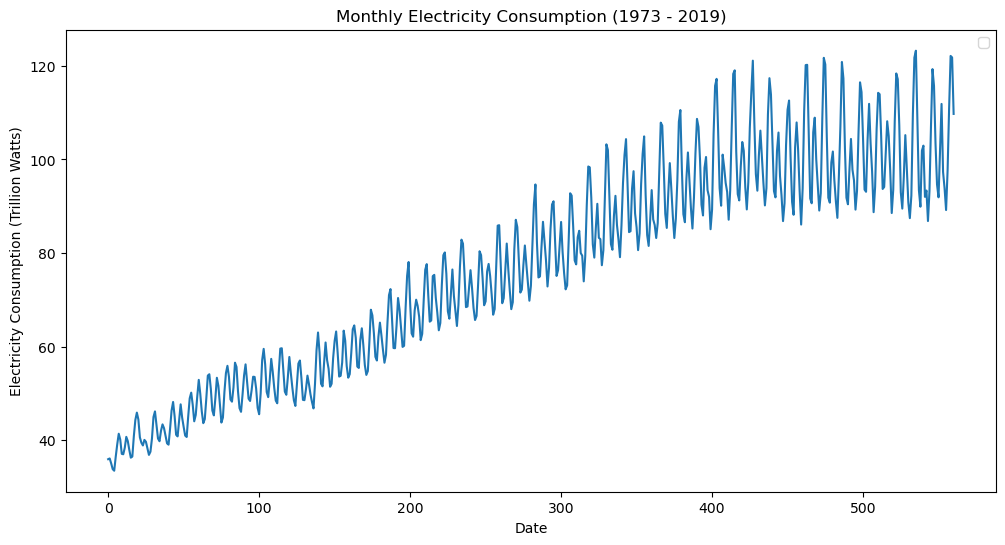

In [259]:
# Visualize the data
plt.figure(figsize=(12, 6))
sns.lineplot(df['Electricty_Consumption_in_TW'])
plt.title('Monthly Electricity Consumption (1973 - 2019)')
plt.xlabel('Date')
plt.ylabel('Electricity Consumption (Trillion Watts)')
plt.legend()
plt.show() #So,this chart is representing that usage of electricity is increasing with time

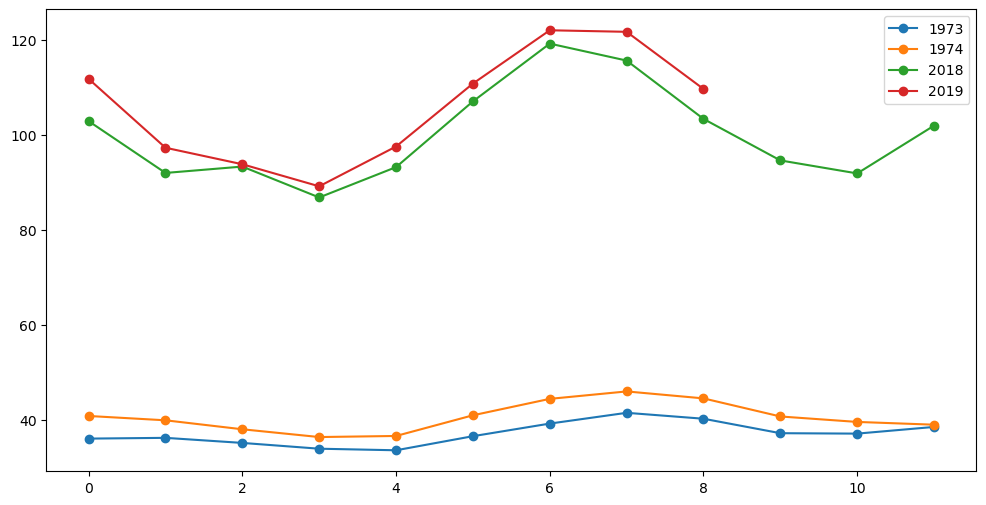

In [313]:
plt.figure(figsize=(12, 6))
plt.plot(df[df['Year']==1973]['Electricty_Consumption_in_TW'].values, marker='o',label='1973')
plt.plot(df[df['Year']==1974]['Electricty_Consumption_in_TW'].values, marker='o',label='1974')
plt.plot(df[df['Year']==2018]['Electricty_Consumption_in_TW'].values, marker='o',label='2018')
plt.plot(df[df['Year']==2019]['Electricty_Consumption_in_TW'].values, marker='o',label='2019')
plt.legend()
plt.show()

In [264]:
dt_df = pd.date_range(start='1973-01-01', end='2020-01-01',freq='M')

In [265]:
dt_df = pd.DataFrame(dt_df)

In [266]:
dt_df.columns = ['date']

In [267]:
dt_df.head(3) 

,date
0,1973-01-31
1,1973-02-28
2,1973-03-31


In [268]:
dt_df['date'] = dt_df['date'].apply(lambda x: '-'.join(str(x).split('-')[:-1]))

In [269]:
dt_df['date'] = pd.to_datetime(dt_df['date'])

In [270]:
dt_df.head(3)

,date
0,1973-01-01
1,1973-02-01
2,1973-03-01


## Merging data set

In [271]:
dt_df2 = dt_df.merge(df,left_on=['date'],right_on=['DATE'],how='left')

### identifying the null values

In [272]:
dt_df2.isnull().sum()

date                            0
DATE                            3
Electricty_Consumption_in_TW    3
Year                            3
dtype: int64

In [273]:
dt_df2[dt_df2.DATE.isnull()] #Identifying missing value

,date,DATE,Electricty_Consumption_in_TW,Year
561,2019-10-01,NaT,NaN,NaN
562,2019-11-01,NaT,NaN,NaN
563,2019-12-01,NaT,NaN,NaN


### Checking which fill will work here backwordfill or forwardfill

In [274]:
dt_df2.iloc[559:] 

,date,DATE,Electricty_Consumption_in_TW,Year
559,2019-08-01,2019-08-01,121.7765,2019.0
560,2019-09-01,2019-09-01,109.7190,2019.0
561,2019-10-01,NaT,NaN,NaN
562,2019-11-01,NaT,NaN,NaN
563,2019-12-01,NaT,NaN,NaN


### Handling Missing Values in dataset

In [275]:
dt_df2.fillna(method='ffill',inplace=True) 

In [276]:
dt_df2.iloc[559:]

,date,DATE,Electricty_Consumption_in_TW,Year
559,2019-08-01,2019-08-01,121.7765,2019.0
560,2019-09-01,2019-09-01,109.7190,2019.0
561,2019-10-01,2019-09-01,109.7190,2019.0
562,2019-11-01,2019-09-01,109.7190,2019.0
563,2019-12-01,2019-09-01,109.7190,2019.0


In [277]:
dt_df2 = dt_df2.loc[:,['date','Electricty_Consumption_in_TW']]

### Implementing Dicky Fuller Test

In [278]:
from statsmodels.tsa.stattools import adfuller

In [279]:
_,p_value,_,_,_,_ = adfuller(dt_df2['Electricty_Consumption_in_TW'],maxlag=1)

In [280]:
p_value

2.6303596549759728e-06

In [281]:
if p_value>0.05:
    print('The time series is non-stationary')
else:
    print('The time series is stationary')

The time series is stationary


In [282]:
dt_df2.shape

(564, 2)

### ACF : Auto Correlation Function
### PACF : Partial Auto Correlation Function

In [283]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sn

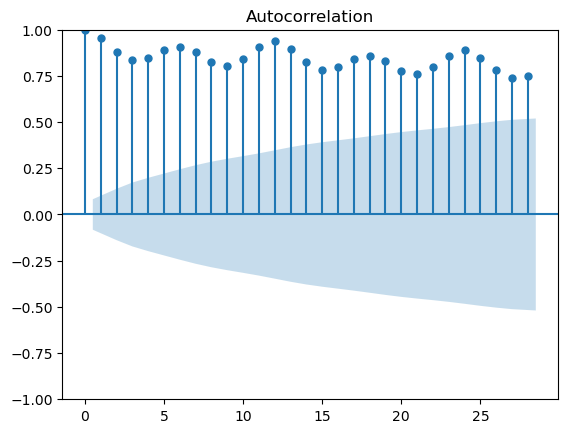

In [284]:
## ACF PLOT
fig = sn.graphics.tsa.plot_acf(dt_df2['Electricty_Consumption_in_TW'])

In [285]:
q = 5

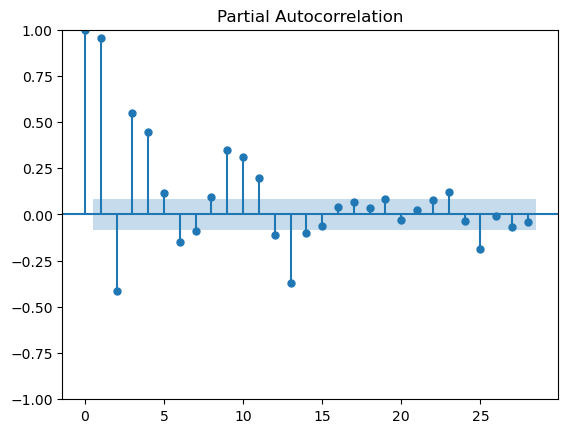

In [286]:
## PACF PLOT
fig = sn.graphics.tsa.plot_pacf(dt_df2['Electricty_Consumption_in_TW'])

In [287]:
p = 8

### Import ARIMA

In [288]:
from statsmodels.tsa.arima.model import ARIMA

In [289]:
arima = ARIMA(dt_df2['Electricty_Consumption_in_TW'],order = (p,0,q))

In [290]:
model = arima.fit()

In [291]:
arima_forecast = model.forecast(steps=24)

In [292]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

In [293]:
rmse = np.sqrt(mean_squared_error(dt_df2['Electricty_Consumption_in_TW'][-24:],arima_forecast))
mape = mean_absolute_percentage_error(dt_df2['Electricty_Consumption_in_TW'][-24:],arima_forecast) * 100

In [294]:
rmse,mape

(6.857209631325384, 5.534890865173153)

### Import Exponential Smoothing

In [295]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [296]:
ets = ExponentialSmoothing(dt_df2['Electricty_Consumption_in_TW'])

In [297]:
model1 = ets.fit()

In [298]:
ets_forecast = model1.forecast(steps=24)

In [299]:
rmse1 = np.sqrt(mean_squared_error(dt_df2['Electricty_Consumption_in_TW'][-24:],ets_forecast))
mape1 = mean_absolute_percentage_error(dt_df2['Electricty_Consumption_in_TW'][-24:],ets_forecast) * 100

In [300]:
rmse1,mape1

(12.041444750734854, 10.004404163541475)

### Compare RMSE and MAPE to select the best model

In [301]:
if rmse1 < rmse and mape1 < mape:
    best_model = 'ETS'
    final_forecast = ets_forecast
else:
    best_model = 'ARIMA'
    final_forecast = arima_forecast

print(f'Selected Model: {best_model}')

Selected Model: ARIMA


### Electricity consumption for next 2 years

In [302]:
demand_estimation = final_forecast.reset_index()

In [303]:
demand_estimation = demand_estimation.loc[:,'predicted_mean'].reset_index()

In [304]:
date = pd.DataFrame(pd.date_range(start='2020-01-01', end='2022-01-01',freq='M'))

In [305]:
date.columns = ['Date']
date['Date'] = date['Date'].apply(lambda x: '-'.join(str(x).split('-')[:-1]))
date['Date'] = pd.to_datetime(date['Date'])

In [306]:
date = date.reset_index()

In [307]:
demand_estimation = date.merge(demand_estimation,left_on=['index'],right_on=['index'],how='left')

In [308]:
demand_estimation = demand_estimation.loc[:,['Date','predicted_mean']]
demand_estimation = demand_estimation.rename(columns = {'predicted_mean':'Electricty_Consumption_Prediction'})

In [309]:
demand_estimation

,Date,Electricty_Consumption_Prediction
0,2020-01-01,113.732333
1,2020-02-01,105.716008
2,2020-03-01,95.720296
3,2020-04-01,91.314534
4,2020-05-01,96.651154
5,2020-06-01,107.468069
6,2020-07-01,117.359678
7,2020-08-01,116.467004
8,2020-09-01,110.408048
9,2020-10-01,104.271556


In [246]:
## To save the file
demand_estimation.to_csv('demand_estimation_new.csv', index = False)

In [311]:
demand_estimation['Year'] = demand_estimation['Date'].dt.year

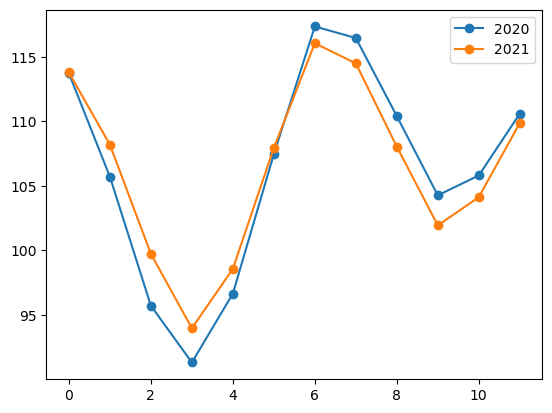

In [312]:
##visualize the predict estimation

plt.plot(demand_estimation[demand_estimation['Year']==2020]['Electricty_Consumption_Prediction'].values, marker='o',label='2020')
plt.plot(demand_estimation[demand_estimation['Year']==2021]['Electricty_Consumption_Prediction'].values, marker='o',label='2021')
plt.legend()
plt.show()